# quant-econ Solutions: Estimation of Spectra

Solutions for http://quant-econ.net/jl/estspec.html

In [5]:
using QuantEcon
using PyPlot

srand(42)  # reproducible results

## Exercise 1

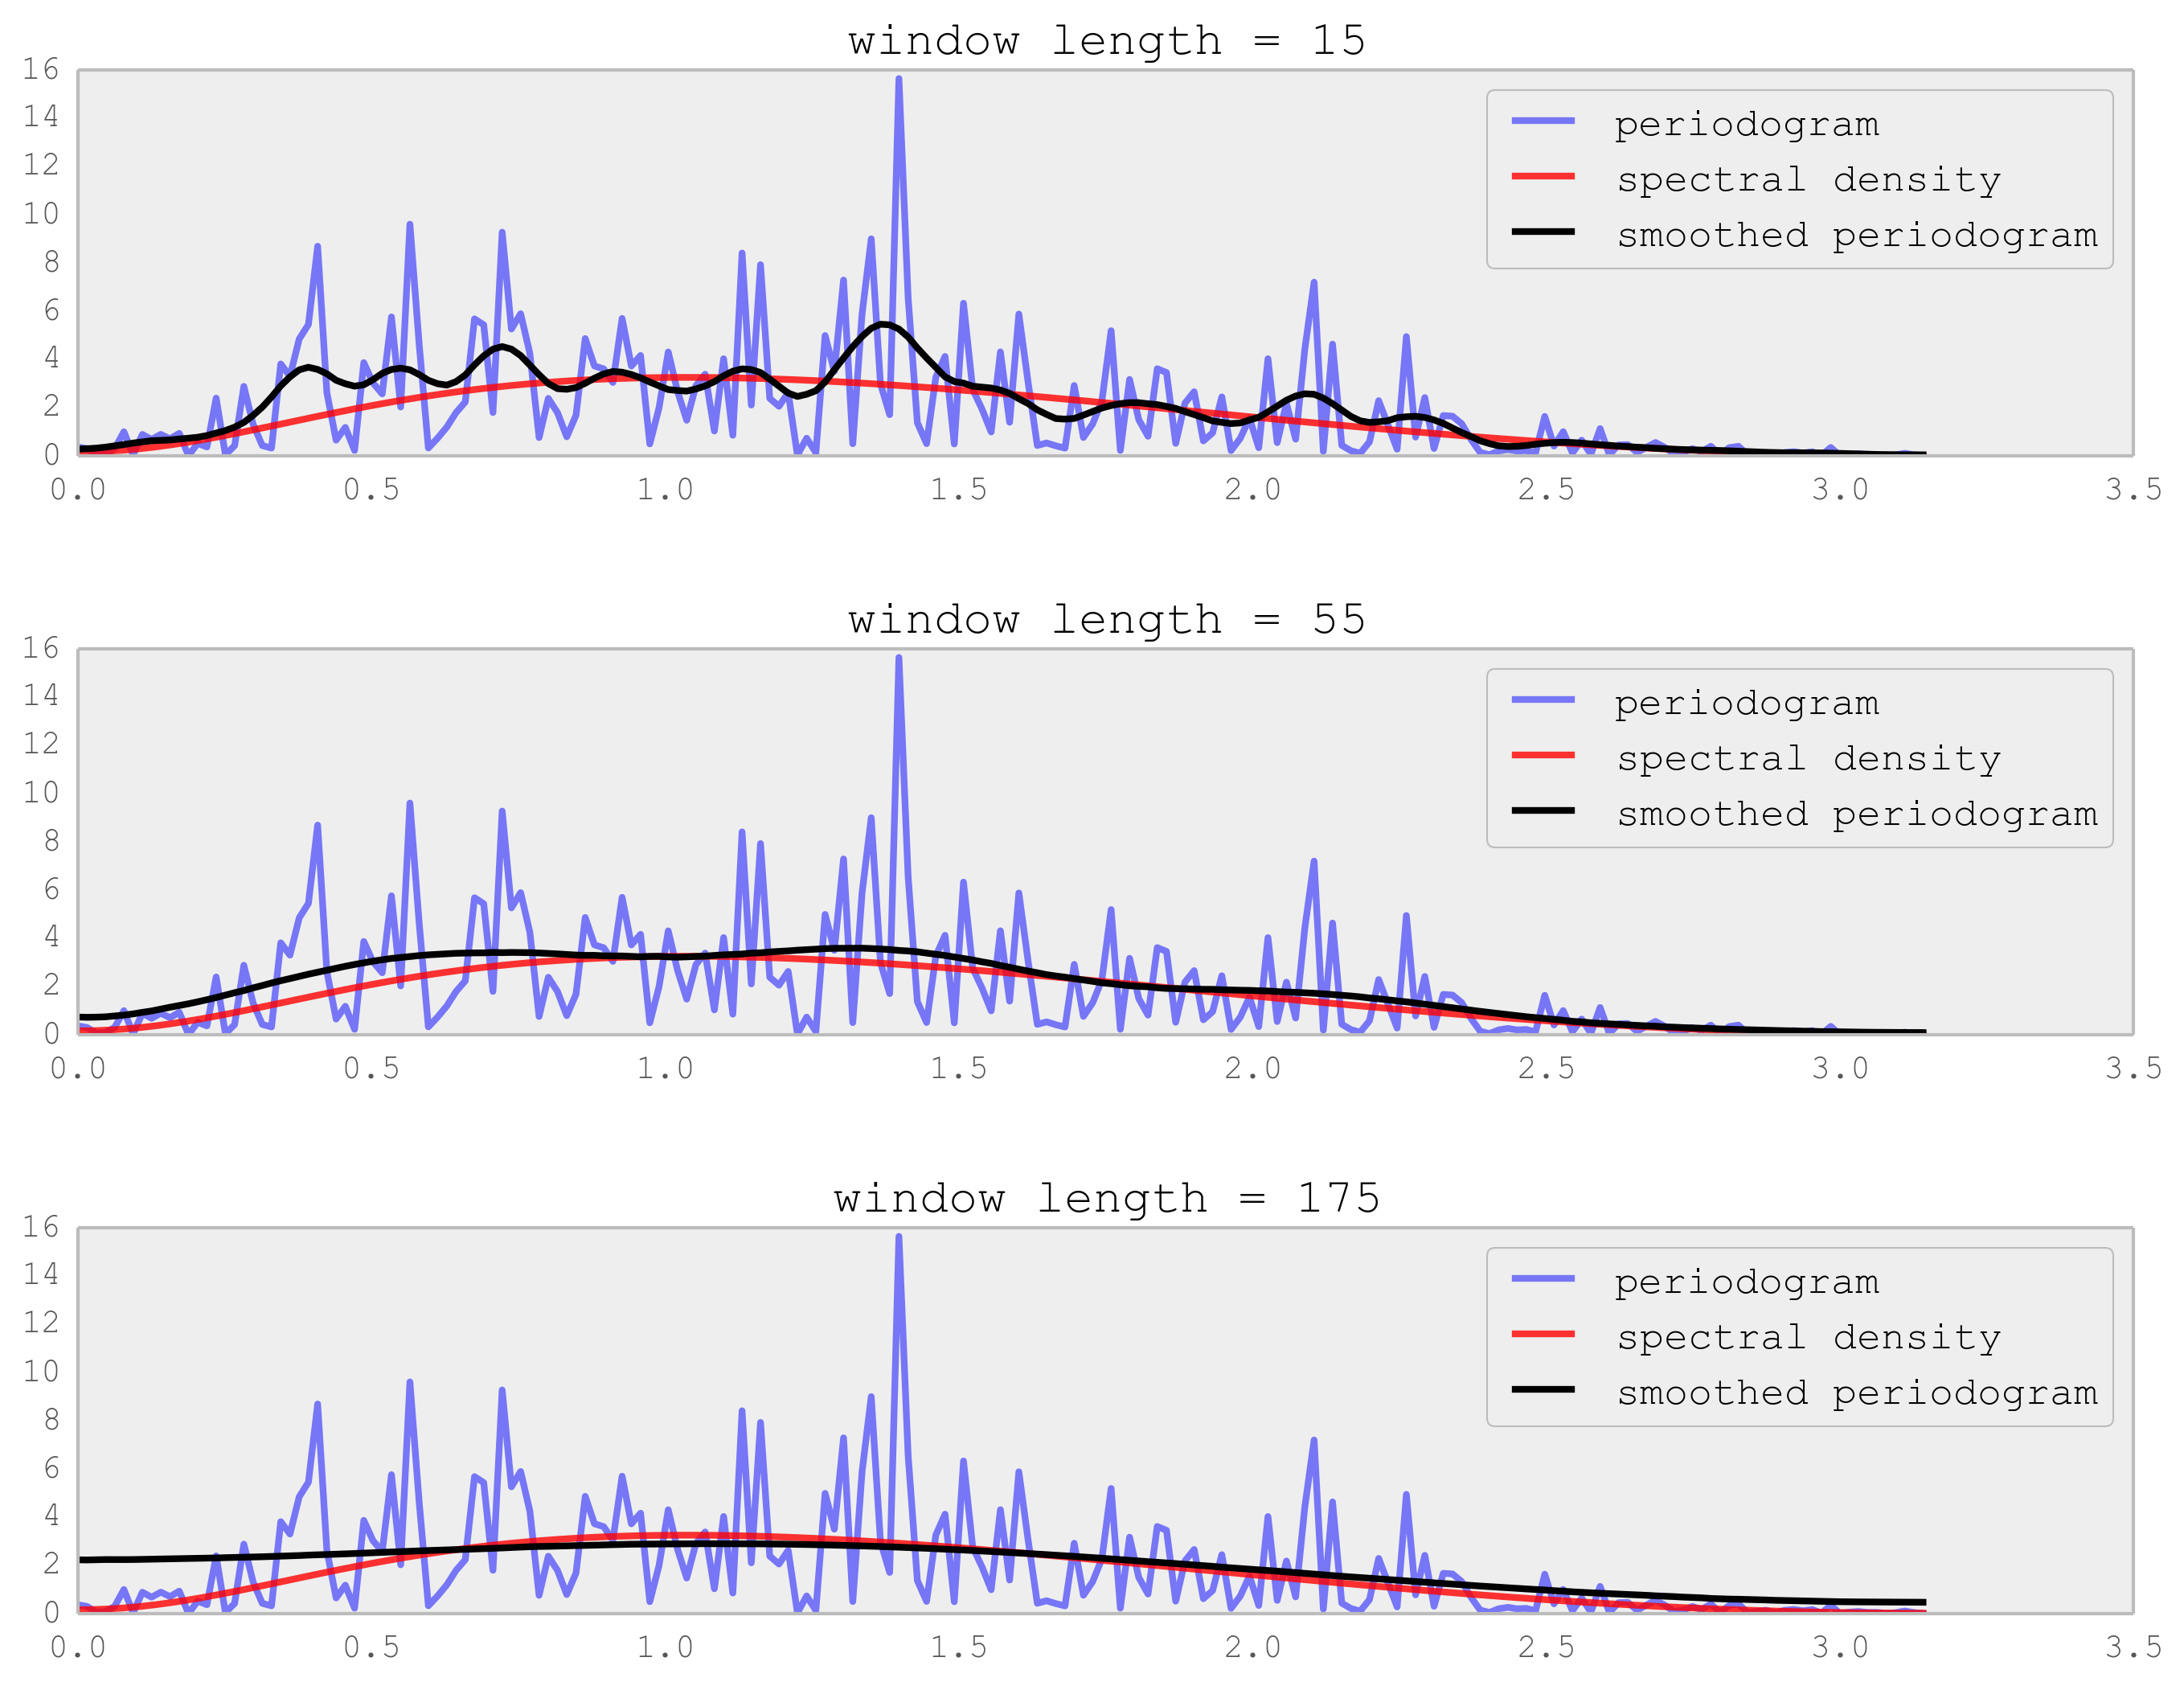

In [6]:
n = 400
phi = 0.5
theta = [0, -0.8]
lp = ARMA(phi, theta)
X = simulation(lp, ts_length=n)

fig, ax = subplots(3, 1)
for (i, wl) in enumerate([15, 55, 175])  # window lengths
    x, y = periodogram(X)
    ax[i][:plot](x, y, "b-", lw=2, alpha=0.5, label="periodogram")

    x_sd, y_sd = spectral_density(lp, two_pi=false, res=120)
    ax[i][:plot](x_sd, y_sd, "r-", lw=2, alpha=0.8, label="spectral density")

    x, y_smoothed = periodogram(X, "hamming", wl)
    ax[i][:plot](x, y_smoothed, "k-", lw=2, label="smoothed periodogram")

    ax[i][:legend]()
    ax[i][:set_title]("window length = $wl")
end

## Exercise 2